## Método de Simpson

Definamos una función $f$ al que queramos calcular su integral en un intevalo $[a,b]$. Primero definimos nuestra función $f$:

In [187]:
# Definimos la función:

f(x) = x^3 + x^2 + 1

f (generic function with 1 method)

In [188]:
# Observación: Si nos dan valores arbitrarios de a, b, y e donde a y b son los limites de nuestro intervalo y e es la longitud del subintervalo, el valor (b-a)/e + 1 (que debe ser el número de subintervalos en nuestro linspace) no es necesariamente entero. Por ello, se aproximó la longitud del intervalo usando la función round(x) para usar (b-a)/e + 1 como un entero y como el número de subintervalos en el código.

function metodo_simpson(f,a,b,e)   
    
    y = linspace(a,b,round((b-a)/e) + 1) # Definimos el linspace con los parámetros que nosotros queremos.
    n = Int(round((b-a)/e) + 1) # Aproximación del número de subintervalos.
    sum = zeros(n) # Definimos una lista vacía que contendrá las aportaciones de cada subintervalo.
    dx = y[2]- y[1] # Definimos una nueva longitud de nuestro subintervalo que es es aproximadamente igual a e.
    suma = 0 # Valor aproximado de la integral
    
    # Método de Simpson
    
    for i in 1:n
        
        x = dx*(f(y[i]) + 4*f((y[i] + dx/2)) + f((y[i]+dx)))/6 # (a+b)/2 = (a+(a+dx))/2 = a + dx/2
        sum[i] = x
    end
    
    # Suma de todos las aportaciones
    
    for i in 1:n
        suma = suma + sum[i]      
    end
    
    return suma
    
end

metodo_simpson (generic function with 1 method)

Para un intervalo de $[-4,5]$ con una longitud de subinteralo de aproximadamente 0.000001:

In [189]:
metodo_simpson(f,-4,5,0.000001)

164.25015102299992

Para un intervalo de $[-10,0]$ con una longitud de subinteralo de aproximadamente 0.0025:

In [190]:
metodo_simpson(f,-10,0,0.0025)

-2156.6641666610294

## Interpolación polinomial de Lagrange

Definamos nuestra lista de puntos en que quieres hacer la interpolación polinomial:

In [191]:
X = linspace(0,2*pi,10);

Luego, definamos la función que queremos aproximar:

In [192]:
f(x) = cos(x);

In [193]:
Y = f.(X);

In [194]:
using SymPy;

El codigo para la interpolación polinomial:

In [218]:
function interpol(listx,listy,x)
    
    # Definimos nuestra variable simbolica para poder construir la función interpoladora
    z=Sym("z");
    
    # Definimos la variable que nos regresará el polinomio interpolador en función de x
    
    sum = 0
    
    # En estos dos loops construimos a L(x)
    
    for j in 1:length(listx)
        l = 1*z/z
        for m in 1:length(listx)
            if j!=m
                l = l*((z-listx[m])/(listx[j] - listx[m]))
            end
        end
        sum = sum + listy[j]*l
    end
    
    # Simplifcamos el polinomio resultante y lo regresamos a una función de julia
    
    sum = simplify(sum)
    L = lambdify(sum,[z])
    return L(x)
end

interpol (generic function with 1 method)

Nuestra función interpolada de $\cos(x)$ con 10 puntos:

In [220]:
interpol(X,Y,Sym("x"))

                      9                        8                         7    
5.42101086242752e-20*x  - 1.97979336357609e-5*x  + 0.000497576342932821*x  - 0

                    6                        5                       4        
.00411366974807148*x  + 0.00878850466168579*x  + 0.0243778891542608*x  + 0.020

              3                      2                              
142554828432*x  - 0.512543349763748*x  + 0.00313254720748013*x + 1.0

In [221]:
using PyPlot

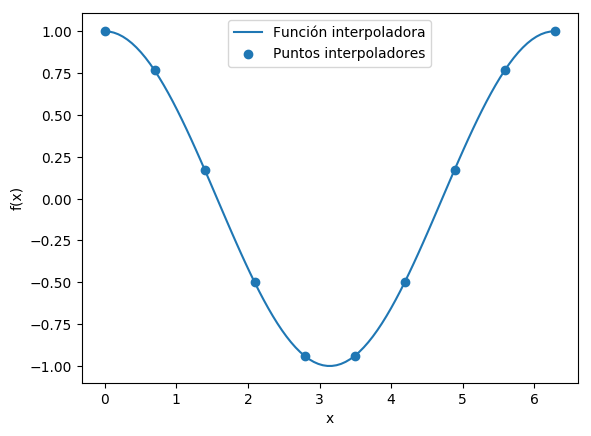

In [222]:
# Graficamos los puntos a interpolar así como la función interpoladora

scatter(X,Y, label="Puntos interpoladores")

xlabel("x")
ylabel("f(x)")
Z = linspace(0,2*pi,100)
W = cos.(Z)
plot(Z,interpol(X,Y,Z), label="Función interpoladora")
legend();

Definimos nuestra nueva función a interpolar:

In [199]:
h(x) = cos(x)*cos(x)

h (generic function with 1 method)

In [200]:
H = h.(X)

10-element Array{Float64,1}:
 1.0      
 0.586824 
 0.0301537
 0.25     
 0.883022 
 0.883022 
 0.25     
 0.0301537
 0.586824 
 1.0      

In [201]:
interpol(X,H,Sym("x"))

                      9                        8                       7      
5.42101086242752e-19*x  + 0.00125598518133148*x  - 0.0315663505495083*x  + 0.3

                6                     5                     4                 
13492883032328*x  - 1.54753813738557*x  + 3.89900431361709*x  - 4.569596087984

   3                     2                            
8*x  + 2.02232704563058*x  - 0.784017877200931*x + 1.0

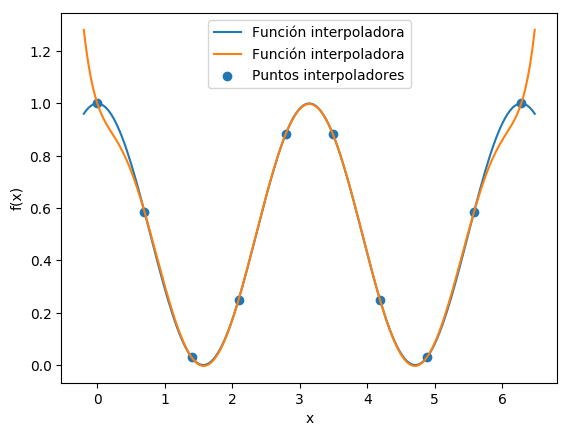

In [202]:
# Graficamos los puntos a interpolar así como la función interpoladora

scatter(X,H, label="Puntos interpoladores")

Z = linspace(-0.2,2*pi + 0.2,200)
W = h.(Z)

xlabel("x")
ylabel("f(x)")
plot(Z,W, label="Función interpoladora")
plot(Z,interpol(X,H,Z), label="Función interpoladora")
legend();

Ahora, vamos a interpolar el siguiente conjuntos de puntos: `[(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]`. Para ello, vamos a definir una lista para las coordenadas en x y otra lista para los valores f(x):

In [203]:
A = [0, 2, 3, 4, 5, 6, 7]
B = [10, -10, -4, 0, 5, 20, -1]

7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

La función interpoladora del conjunto de los 7 puntos anteriores:

In [204]:
interpol(A,B,Sym("x"))

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

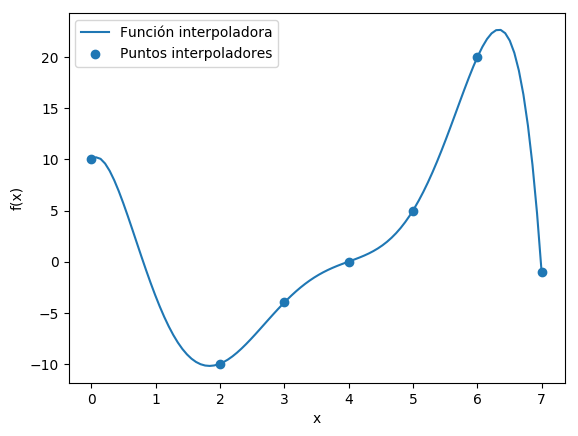

In [205]:
# Graficamos los puntos a interpolar así como la función interpoladora

scatter(A,B, label="Puntos interpoladores")

Z = linspace(0,7,100)
W = interpol(A,B,Z)

xlabel("x")
ylabel("f(x)")
plot(Z,W, label="Función interpoladora")
legend()
show()

## Comparación gráfica de la convergencia de 3 métodos de integración numérica

Para esta comparacion, añademos los otros dos métodos que se hicieron para la tarea 6:

In [206]:
# Observación: Si nos dan valores arbitrarios de a, b, y e donde a y b son los limites de nuestro intervalo y e es la longitud del subintervalo, el valor (b-a)/e + 1 (que debe ser el número de subintervalos en nuestro linspace) no es necesariamente entero. Por ello, se aproximó la longitud del intervalo usando la función round(x) para usar (b-a)/e + 1 como un entero y como el número de subintervalos en el código.

function metodo_rectangulo(f,a,b,e)   
    
    y = linspace(a,b,round((b-a)/e) + 1) # Definimos el linspace con los parámetros que nosotros queremos.
    n = Int(round((b-a)/e) + 1) # Aproximación del número de subintervalos.
    sum = zeros(n) # Definimos una lista vacía que contendrá las aportaciones de cada subintervalo.
    dx = y[2]- y[1] # Definimos una nueva longitud de nuestro subintervalo que es es aproximadamente igual a e.
    suma = 0 # Valor aproximado de la integral
    
    # Método del rectángulo
    
    for i in 1:n
        
        x = dx *f((y[i] + dx/2)) # (a+b)/2 = (a+(a+dx))/2 = a + dx/2
        sum[i] = x
    end
    
    # Suma de todos las aportaciones
    
    for i in 1:n
        suma = suma + sum[i]      
    end
    
    return suma
    
end

metodo_rectangulo (generic function with 1 method)

In [207]:
function metodo_trapecio(f,a,b,e)   
       
    y = linspace(a,b,round((b-a)/e) + 1) # Definimos el linspace con los parámetros que nosotros queremos.
    n = Int(round((b-a)/e) + 1) # Aproximación del número de subintervalos.
    sum = zeros(n) # Definimos una matrix vacía que contendrá las aportaciones de cada subintervalo.
    dx = y[2]- y[1] # Definimos una nueva longitud de nuestro subintervalo que es es aproximadamente igual a e.
    suma = 0 # Valor aproximado de la integral
    
    # Método del trapecio
    
    for i in 1:n
        
        x = dx*(f(y[i]) + f((y[i]+dx)))/2 # (a+b)/2 = (a+(a+dx))/2 = a + dx/2
        sum[i] = x
    end
    
    # Suma de todos las aportaciones
    
    for i in 1:n
        suma = suma + sum[i]      
    end
    
    return suma
    
end

metodo_trapecio (generic function with 1 method)

Definamos nuestra función $f(x)=-\sin(x)$ y nuestro intervalo de integración como $[0,2\pi]$

In [208]:
f(x)=-sin(x)

f (generic function with 1 method)

Definamos una función para cada método de integración que genera una lista de valores de la integral calculada para un $\Delta x=1/2^{i-1}$:

In [209]:
# Función que nos genera una lista cuyas entradas son valores de la integral en función de una dx dada. En este caso, se tomó dx=1/2^n para algún n. Se hizo una función para cada método de integración.

# Para el método del rectángulo

function con_rect(f,a,b,n)
    rectlist=zeros(n)
    
    for i in 1:n
        rectlist[i] =  metodo_rectangulo(f,a,b,1/2^(i-1))
    end
    return rectlist
end

# Para el método del trapecio

function con_trap(f,a,b,n)
    traplist=zeros(n)
    
    for i in 1:n
        traplist[i] =  metodo_trapecio(f,a,b,1/2^(i-1))
    end
    return traplist
end

# Para el método de Simpson

function con_simp(f,a,b,n)
    simplist=zeros(n)
    
    for i in 1:n
        simplist[i] =  metodo_simpson(f,a,b,1/2^(i-1))
    end
    return simplist
end

con_simp (generic function with 1 method)

In [210]:
con_simp(f,0,2*pi,10)

10-element Array{Float64,1}:
 -0.500216   
 -0.114546   
 -0.0314169  
 -0.0078853  
 -0.0019344  
 -0.000488542
 -0.000122143
 -3.05362e-5 
 -7.63409e-6 
 -1.90734e-6 

Para graficar nuestras listas dadas por las tres funciones anteriores, debemos hacer una función que nos regrese una lista de valores $1/\Delta x$:

In [211]:
function e_list(n)
    elist = zeros(n)
    
    for i in 1:n
        elist[i]=2^(i-1)
    end
    return elist
end

e_list (generic function with 1 method)

In [212]:
e_list(10)

10-element Array{Float64,1}:
   1.0
   2.0
   4.0
   8.0
  16.0
  32.0
  64.0
 128.0
 256.0
 512.0

Además, mandamos a llamar al paquete `PyPlot`:

In [213]:
using PyPlot

Finalmente, graficamos el valor de la integral contra $1/\Delta x$:

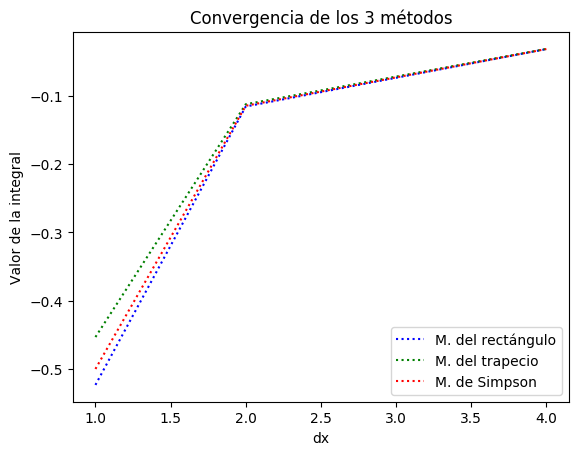

In [232]:
# Para el primero término al tercero:

xlabel("dx")
ylabel("Valor de la integral")
title("Convergencia de los 3 métodos")

plot((e_list(3)), con_rect(f,0,2*pi,3), color="blue", linewidth=1.5, linestyle=":", label="M. del rectángulo")
plot((e_list(3)), con_trap(f,0,2*pi,3), color="green", linewidth=1.5, linestyle=":", label="M. del trapecio")
plot((e_list(3)), con_simp(f,0,2*pi,3), color="red", linewidth=1.5, linestyle=":", label="M. de Simpson")
legend()
show();

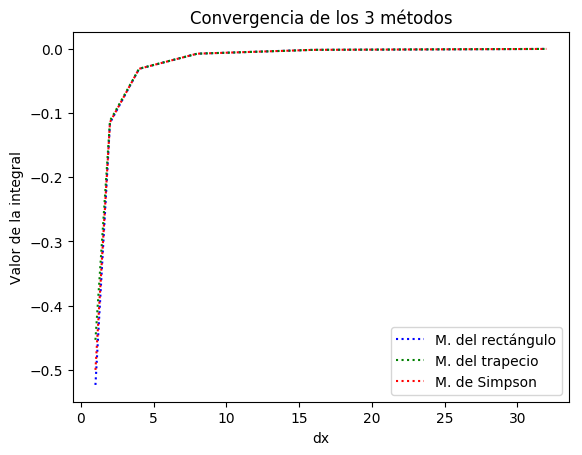

In [233]:
# Para el primero término al sexto:

xlabel("dx")
ylabel("Valor de la integral")
title("Convergencia de los 3 métodos")

plot((e_list(6)), con_rect(f,0,2*pi,6), color="blue", linewidth=1.5, linestyle=":", label="M. del rectángulo")
plot((e_list(6)), con_trap(f,0,2*pi,6), color="green", linewidth=1.5, linestyle=":", label="M. del trapecio")
plot((e_list(6)), con_simp(f,0,2*pi,6), color="red", linewidth=1.5, linestyle=":", label="M. de Simpson")
legend()
show();

Nosotros sabemos que $$\displaystyle \int_0^{2\pi} \sin(x) \, dx = 0.$$

Así que tiene sentido que el valor de la integral dada por cada métodos converjan a $0$.

En la primera gráfica, podemos observar que los tres métodos para el primero valor de $\Delta x$ dan un valor distinto, pero que después del segundo valor de $\Delta x$ son aproximadamente iguales. En la segunda gráfica, se puede observar que a partir de $1/\Delta x \approx 15$, la aproximación es muy cercana al valor esperado. Esto es, para $\Delta x \approx 1/15$. Además, para esta función, la aproximación es mejor para el método del trapecio, seguido por el método de Simpson y finalmente el método del rectángulo.